In [1]:
pip install pandas nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 6.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 5.8 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 5.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 6.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 2.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 4.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 22.1 MB/s eta 0:00:0000:010:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

/var/folders/4_/8jk7rgt141nghfj9gsw4_thm0000gn/T/ipykernel_17973/3329704558.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zainanasalma/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zainanasalma/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zainanasalma/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
df = pd.read_csv('mbti.csv')

In [6]:
def clean_posts(post):
    # Remove URLs
    post = re.sub(r'http\S+', '', post)
    # Remove special characters and numbers
    post = re.sub(r'[^A-Za-z\s]', '', post)
    # Tokenize
    tokens = word_tokenize(post)
    # Initialize Lemmatizer
    lemmatizer = WordNetLemmatizer()
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stopwords.words('english')]
    # Rejoin lemmatized tokens into a single string
    clean_post = ' '.join(lemmatized_tokens)
    return clean_post

The next step is to apply the cleaning methods described above, to our dataset. Given that we have 8000 datapoints, this is a time-consuming process. Thus, we save it locally and use that one in the future instead of cleaning the data everytime we want to apply a model.

In [7]:
df = df.head(500)
df['cleaned_posts'] = df['posts'].apply(lambda x: '|||'.join([clean_posts(post) for post in x.split('|||')]))

In [8]:
df.to_csv('cleaned_dataset_500.csv', index=False)

In [17]:
import pandas as pd

df = pd.read_csv('cleaned_dataset_500.csv')


In [19]:
df.iloc[0]['posts']

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [20]:
df.iloc[0]['cleaned_posts']

'||||||enfp intj moment sportscenter top ten play prank|||lifechanging experience life|||repeat today|||may perc experience immerse|||last thing infj friend posted facebook committing suicide next day rest peace|||hello enfj sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth||||||welcome stuff|||game set match|||prozac wellbrutin least thirty minute moving leg dont mean moving sitting desk chair weed moderation maybe try edible healthier alternative|||basically come three item youve determined type whichever type want would likely use given type cognitive function whatnot left|||thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim|||dear enfp favorite video game growing current favorite video game cool||||||appears late sad|||there someone everyone|||wait thought confidence good thing|||cherish time solitude bc revel within inner world whereas time id workin 

In [25]:
df

,type,posts,cleaned_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,||||||enfp intj moment sportscenter top ten pl...
1,ENTP,'I'm finding the lack of me in these posts ver...,im finding lack post alarming|||sex boring pos...
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one|||course say know thats blessing curs...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp enjoyed conversation day esoteric ga...
4,ENTJ,'You're fired.|||That's another silly misconce...,youre fired|||thats another silly misconceptio...
...,...,...,...
495,INFP,I think yesterday I contemplated if I was slow...,think yesterday contemplated slowly going mad ...
496,INFJ,'https://www.youtube.com/watch?v=CBTOGVb_cQg||...,|||answer subject thread wont youll never know...
497,ENTP,"'Well when you figure out where to begin, plea...",well figure begin please remain unconvinced do...
498,INFJ,'Dude that sounds fantastic! If you ever put a...,dude sound fantastic ever put anything id defi...


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000) 
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_posts'])

In [43]:
from sklearn.model_selection import train_test_split

X = tfidf_features
y = df['type'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


((400, 5000), (100, 5000))

In [135]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [139]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.26


In [140]:
pwd

'/home/daneshvar/Documents/CS229/MBTI'

In [22]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 3.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.1/239.1 MB 4.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 3.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 3.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 18.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 21.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB

In [282]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score


In [293]:
#Parameters:
MAX_SEQUENCE_LENGTH = 5000 # Max number of words in each complaint.
VOCAB_SIZE = 24873 # The maximum number of words to be used    ----- len(word_index)+1
EMBEDDING_DIM = 200 # Dimension of the word embedding vectors (50, 100, 200, 300) #Each token is represented as a vector in this space, and the size of the vector is the embedding size
num_classes = 14

RNNS using LSTM

create text encoder

In [300]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=VOCAB_SIZE) # Setup tokenizer
tokenizer.fit_on_texts(df['cleaned_posts']) # Fit tokenizer on our text data
tokenizer.word_index # Get our learned vocabulary
word_index = tokenizer.word_index # Get our learned vocabulary
word_index
len(word_index)

24872

,type,posts,cleaned_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,||||||enfp intj moment sportscenter top ten pl...
1,ENTP,'I'm finding the lack of me in these posts ver...,im finding lack post alarming|||sex boring pos...
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one|||course say know thats blessing curs...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp enjoyed conversation day esoteric ga...
4,ENTJ,'You're fired.|||That's another silly misconce...,youre fired|||thats another silly misconceptio...
...,...,...,...
495,INFP,I think yesterday I contemplated if I was slow...,think yesterday contemplated slowly going mad ...
496,INFJ,'https://www.youtube.com/watch?v=CBTOGVb_cQg||...,|||answer subject thread wont youll never know...
497,ENTP,"'Well when you figure out where to begin, plea...",well figure begin please remain unconvinced do...
498,INFJ,'Dude that sounds fantastic! If you ever put a...,dude sound fantastic ever put anything id defi...


In [299]:
X = tokenizer.texts_to_sequences(df['cleaned_posts']) # Convert text to sequence USING tokenizer created above
#print('text to sequence tooks like' , X[0])
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen= MAX_SEQUENCE_LENGTH) # Pad the sequence to the same length to make it uniform
#print('text sequence to sequence pad looks like' ,X[0])
y = df['type'] 
y_one_hot = pd.get_dummies(y)   # One hot encode the target variable


label_tokenizer = tf.keras.preprocessing.text.Tokenizer()
label_tokenizer.fit_on_texts(list(y))
label_seq = np.array(label_tokenizer.texts_to_sequences(y))
label_seq = label_seq.reshape(-1)

X[1:10]

array([[    0,     0,     0, ...,    23,    23,   118],
       [    0,     0,     0, ...,  1719,   880,   266],
       [    0,     0,     0, ...,   217,     3,    89],
       ...,
       [    0,     0,     0, ...,   494,  1507,    23],
       [    0,     0,     0, ...,  3055,  4954,   102],
       [    0,     0,     0, ...,  8337,  2717, 11747]], dtype=int32)

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=1234)
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

print("X", X_train)
print('-------------')
print("y is ", y_test.head())

(400, 5000) (400, 14)
(100, 5000) (100, 14)
X [[   0    0    0 ... 5506  105 1342]
 [   0    0    0 ... 2348   13  164]
 [   0    0    0 ...  192  143   31]
 ...
 [   0    0    0 ...   94   65    2]
 [   0    0    0 ...  822   92   18]
 [   0    0    0 ...  552  544 1119]]
-------------
y is        ENFJ   ENFP   ENTJ   ENTP   ESFP   ESTP   INFJ   INFP   INTJ   INTP  \
67    True  False  False  False  False  False  False  False  False  False   
416  False  False  False  False  False  False   True  False  False  False   
350  False  False  False  False  False  False  False   True  False  False   
358  False  False  False  False  False  False  False  False  False   True   
112  False  False  False  False  False  False  False   True  False  False   

      ISFJ   ISFP   ISTJ   ISTP  
67   False  False  False  False  
416  False  False  False  False  
350  False  False  False  False  
358  False  False  False  False  
112  False  False  False  False  


### Model 

Recurrent Neural Network(RNN) is a type of Neural Network where the output from the previous step is fed as input to the current step. This is a short-term memory to process Sequential data

Advantages : 
- RNN has a memory that captures what has been calculated so far.
- RNNs are ideal for text and speech data analysis.

Disadvantages: 
- RNN suffers from exploding and vanishing gradient, which makes the RNN model learn slower by propagating a lesser amount of error backward.
- This works well for short sentences, when we deal with a long article, there will be a long term dependency problem

Long Short Term Memory network usually just called “LSTM” — is a special kind of RNN. It is capable of learning long-term dependencies. LLSTM is explicitly designed to avoid the long-term dependency problem.

How do LSTM solve this problem? Thanks to their architecture!


LSTM has chains of repeating the LSTM block. It is called LSTM cell. Each LSTM cells have four neural network layers interacting within: Cell State, Forget Gate, Input Gate, Output Gate
Each LSTM cell receives an input from an Input sequence, previous cell state and output from previous LSTM cell.

In [303]:
model = Sequential() # Call Sequential to initialize a network
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=X.shape[1])) # Add an embedding layer which represents each unique token as a vector
model.add(SpatialDropout1D(0.2)) # Dropout layer to avoid overfitting
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2)) # Recurrent layer
model.add(Dense(num_classes, activation='softmax')) # Output layer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Compile the network

epochs = 5 # Number of passes through entire dataset
batch_size = 64 # Number of samples processed before the model is updated

history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_split=0.2 ,
                    callbacks=[
                        EarlyStopping(monitor='val_loss', 
                                      min_delta=0.0001)]) # Train the model


Epoch 1/5
5/5 [==============================] - 152s 29s/step - loss: 2.6286 - accuracy: 0.1406 - val_loss: 2.6143 - val_accuracy: 0.2375
Epoch 2/5
2/5 [===========>..................] - ETA: 1:00 - loss: 2.5874 - accuracy: 0.3828

In [ ]:
print(X_test)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)


[[    0     0     0 ...   845 13204    50]
 [    0     0     0 ...   585     4   116]
 [    0     0     0 ...   243    43     5]
 ...
 [    0     0     0 ...   350  1759    56]
 [    0     0     0 ...     1 11163    43]
 [    0     0     0 ...     2   450 23101]]
4/4 [==============================] - 3s 556ms/step
[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 9
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 9 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]


In [279]:
y_test = np.argmax(y_test.values, axis=1) # Convert one hot encoded y_test back to categorical


In [ ]:
print(y_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[ 0  6  7  9  7  8  6  3 11  7  7  7  9  6  7  8  9  7  7  6  8  7  6 11
  6  0  2  7 13  6  7  3  9  3  9  9  6  7 11 10  7  8  8  2  7  1  4  7
  2 13  1 13  8  7 13  7  7  9  7  3  0  6  1 13  9  6  8  5 11  3  9  6
  8  9  9  7  7  6 13  9  9  9  7  8  8  7  6  7 12  6  6  5  8  9  9  9
  7  1  7  0]
Accuracy: 0.26


In [ ]:
def graph_plots(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
graph_plots(history, "accuracy")
graph_plots(history, "loss")


#### what if I don't one_hot encode my labels and do a multiclass classification with each class represented as an integer 

In [ ]:
label_seq = label_seq - 1
X_train, X_test, y_train, y_test = train_test_split(X, label_seq, test_size=0.2, random_state=1234)
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)
print(min(y_train))


(400, 1000) (400,)
(100, 1000) (100,)
0
[ 8  1  0  2  0  3  1  5  6  0  0  0  2  1  0  3  2  0  0  1  3  0  1  6
  1  8  9  0  7  1  0  5  2  5  2  2  1  0  6 10  0  3  3  9  0  4 13  0
  9  7  4  7  3  0  7  0  0  2  0  5  8  1  4  7  2  1  3 12  6  5  2  1
  3  2  2  0  0  1  7  2  2  2  0  3  3  0  1  0 11  1  1 12  3  2  2  2
  0  4  0  8]


In [187]:
model = Sequential() # Call Sequential to initialize a network
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=X.shape[1])) # Add an embedding layer which represents each unique token as a vector
model.add(SpatialDropout1D(0.2)) # Dropout layer to avoid overfitting
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2)) # Recurrent layer
model.add(Dense(num_classes, activation='softmax')) # Output layer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Compile the network

epochs = 5 # Number of passes through entire dataset
batch_size = 64 # Number of samples processed before the model is updated

history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_split=0.2 ,
                    callbacks=[
                        EarlyStopping(monitor='val_loss', 
                                      min_delta=0.001)]) # Train the model

Epoch 1/5
5/5 [==============================] - 11s 2s/step - loss: 2.6293 - accuracy: 0.1750 - val_loss: 2.6097 - val_accuracy: 0.2375
Epoch 2/5
5/5 [==============================] - 7s 1s/step - loss: 2.5715 - accuracy: 0.2281 - val_loss: 2.4937 - val_accuracy: 0.2375
Epoch 3/5
5/5 [==============================] - 13s 2s/step - loss: 2.3709 - accuracy: 0.2219 - val_loss: 2.2792 - val_accuracy: 0.2375
Epoch 4/5
5/5 [==============================] - 8s 2s/step - loss: 2.1986 - accuracy: 0.2375 - val_loss: 2.2463 - val_accuracy: 0.1375
Epoch 5/5
5/5 [==============================] - 8s 2s/step - loss: 2.1653 - accuracy: 0.1844 - val_loss: 2.2521 - val_accuracy: 0.1375


In [188]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

4/4 [==============================] - 1s 186ms/step
Accuracy: 0.15


Indeed,one hot encoding is better.

### Improving the accuracy methods:

- Bbidirectional LSTM
- experiment with pre-trained embeddings like GloVe or Word2Vec for potentially better representations of your text.
- changing the number of units in the LSTM layer, or experiment with stacking multiple LSTM layers (Risk of overfitting and quiet costly)
- Use GRU instead of LSTM or add conv1D before LSTM
- Adjust dropout rates 
- Use L1/L2 reg 
- Optimizers: SGD or RMSprop
- Adjust Batchsize or Lr
- Transformer????
- Error Analysis

### First : Bidirectional LSTM

In [207]:
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.layers import Dense, Activation, Dropout
from matplotlib import pyplot as plt

Bidirectional LSTM trains two layers on the input sequence. One LSTM layer on the input sequence and second LSTM layer on the reversed copy of the input sequence provides more context for learning sequences

In [201]:
#Reserve word_idex
#reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#def decode_article(text):
# return ' '.join([reverse_word_index.get(i,'?') for i in text])
#print(decode_article(X[0]))

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? 

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=1234)
print(X_train.shape,y_train.shape)

(400, 1000) (400, 14)


In [213]:
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     EMBEDDING_DIM))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(EMBEDDING_DIM, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(EMBEDDING_DIM, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(EMBEDDING_DIM, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(num_classes, activation='softmax'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Epoch 1/10
5/5 [==============================] - 29s 4s/step - loss: 2.6388 - accuracy: 0.0562 - val_loss: 2.6382 - val_accuracy: 0.1125
Epoch 2/10
5/5 [==============================] - 21s 4s/step - loss: 2.6361 - accuracy: 0.1250 - val_loss: 2.6365 - val_accuracy: 0.1375
Epoch 3/10
5/5 [==============================] - 18s 4s/step - loss: 2.6351 - accuracy: 0.1094 - val_loss: 2.6332 - val_accuracy: 0.1375
Epoch 4/10
5/5 [==============================] - 16s 3s/step - loss: 2.6236 - accuracy: 0.1469 - val_loss: 2.6156 - val_accuracy: 0.1375
Epoch 5/10
5/5 [==============================] - 18s 4s/step - loss: 2.6056 - accuracy: 0.1344 - val_loss: 2.5795 - val_accuracy: 0.1375
Epoch 6/10
5/5 [==============================] - 14s 3s/step - loss: 2.6104 - accuracy: 0.1281 - val_loss: 2.5630 - val_accuracy: 0.1375
Epoch 7/10
5/5 [==============================] - 12s 2s/step - loss: 2.5729 - accuracy: 0.1750 - val_loss: 2.5492 - val_accuracy: 0.2375
Epoch 8/10
5/5 [==================

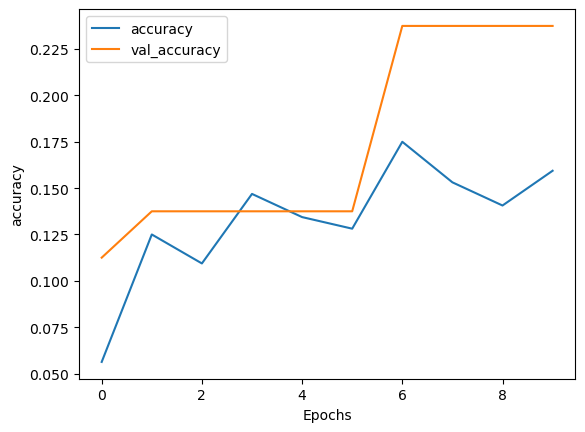

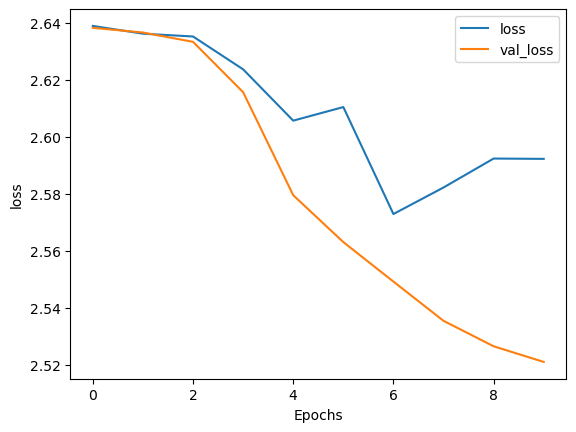

In [214]:
epochs = 10 # Number of passes through entire dataset
batch_size = 64 # Number of samples processed before the model is updated

history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_split=0.2 ,
                    callbacks=[
                        EarlyStopping(monitor='val_loss', 
                                      min_delta=0.001)]) # Train the model



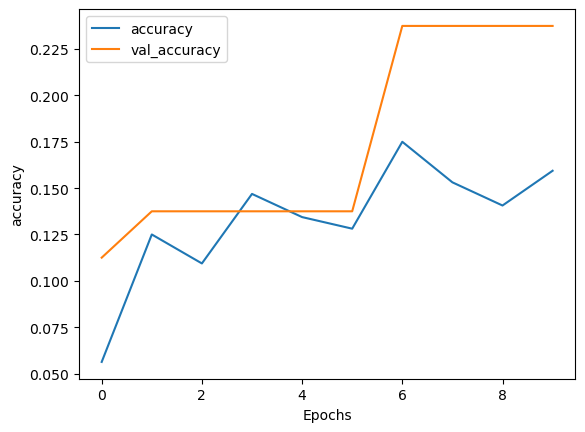

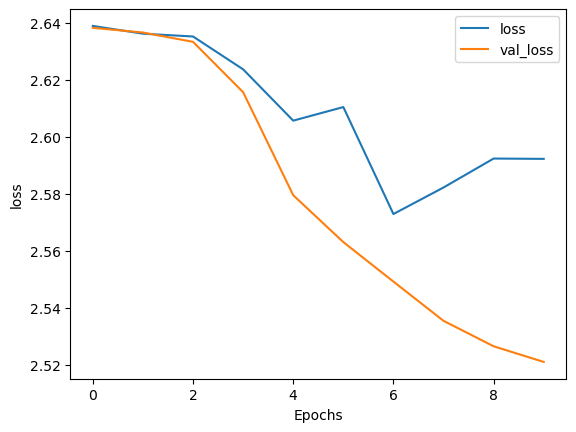

In [215]:
def graph_plots(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
graph_plots(history, "accuracy")
graph_plots(history, "loss")